# **Importing Important Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Loading Data



In [2]:
MNSIT_Fashion = keras.datasets.fashion_mnist


In [3]:
(x_train,y_train), (x_test,y_test) = MNSIT_Fashion.load_data()

4423680/4422102 [==============================] - 0s 0us/step


# **Exploring the Data**

In [4]:
pd.DataFrame(x_train.reshape(60000,784)).head()   

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,41,188,103,54,48,43,87,168,133,16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,49,136,219,216,228,...,244,240,243,214,224,162,0,2,0,0,0,0,0,0,0,0,0,1,0,0,139,146,130,135,135,137,125,124,125,121,119,114,130,76,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,118,24,0,0,0,0,0,48,88,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,100,212,205,...,106,102,75,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18,42,57,56,32,8,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,175,156,64,14,54,137,204,194,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,73,186,177,183,175,188,...,83,152,85,160,133,100,12,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,35,4,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,189,206,187,32,...,255,242,255,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,61,102,168,25,0,139,161,74,0,0,0,0,0,0,0,0,0,0


In [5]:
print(x_train.shape)
print(len(x_train))
x_train[0].shape

(60000, 28, 28)
60000


(28, 28)

In [6]:
print(x_test.shape)
print(len(x_test))

(10000, 28, 28)
10000


In [7]:
print(y_train.shape)
print(len(y_train))

(60000,)
60000


In [8]:
pd.DataFrame(y_train).value_counts()   #gives count of unique values, works with only pandas dataframe

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
dtype: int64

In [9]:
pd.DataFrame(y_test).value_counts()   #gives count of unique values, works with only pandas dataframe

9    1000
8    1000
7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
1    1000
0    1000
dtype: int64

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

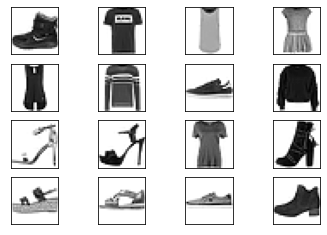

In [11]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [12]:
y_train[:16]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9], dtype=uint8)

# **Building My Model**

In [13]:
#normalizing the value between 0-1, model works better after normalizing(accuracy increases from 75% to 90%)
x_train = x_train/255
x_test = x_test/255
pd.DataFrame(x_train.reshape(60000,784)).head()  

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,0.160784,0.737255,0.403922,0.211765,0.188235,0.168627,0.341176,0.658824,0.521569,0.062745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.192157,0.533333,0.858824,0.847059,0.894118,...,0.956863,0.941176,0.952941,0.839216,0.878431,0.635294,0.000000,0.007843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.000000,0.0,0.545098,0.572549,0.509804,0.529412,0.529412,0.537255,0.490196,0.486275,0.490196,0.474510,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,0.462745,0.094118,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.345098,0.019608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.047059,0.392157,0.831373,0.803922,...,0.415686,0.400000,0.294118,0.039216,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.003922,0.000000,0.000000,0.000000,0.070588,0.164706,0.223529,0.219608,0.125490,0.031373,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,0.686275,0.611765,0.250980,0.054902,0.211765,0.537255,0.800000,0.760784,0.400000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.286275,0.729412,0.694118,0.717647,0.686275,0.737255,...,0.325490,0.596078,0.333333,0.627451,0.521569,0.392157,0.047059,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.015686,0.0,0.007843,0.000000,0.137255,0.015686,0.129412,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101961,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.741176,0.807843,0.733333,0.125490,...,1.000000,0.949020,1.000000,0.274510,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.239216,0.400000,0.658824,0.098039,0.000000,0.545098,0.631373,0.290196,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


**Below code can also be :**

x_train = x_train.reshape(len(x_train),28*28

model = keras.Sequential([  
    layers.Dense(128, input_shape= (784,),activation='sigmoid'),  
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(10, activation = 'softmax')

])



In [ ]:
model = keras.Sequential([
    layers.Flatten(input_shape = (28, 28)),      #Flattens the input. Does not affect the batch size.(28*28 => 784)
    #hidden layers
    layers.Dense(128, activation='sigmoid'),     #In Dense layer every neuron is connected to the every next neuron
    layers.Dense(128, activation='sigmoid'),
    #output layer
    layers.Dense(10, activation = 'softmax')     #Softmax converts a vector of values to a probability distribution.
])

In [ ]:
model.compile(
    optimizer = 'adam',                         #Adam optimization is a stochastic gradient descent method
    loss = 'sparse_categorical_crossentropy',   #truth label are  integer encoded, eg. [1],[2],[3],.... whereas in cross categorical entropy needs one-hot encoded input, eg [0,1,0],[1,0,0],[0,0,1]
    metrics = ['accuracy']
)
 

# **Training My Model** 

In [ ]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5882 - accuracy: 0.7974
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3876 - accuracy: 0.8599
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3486 - accuracy: 0.8736
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3257 - accuracy: 0.8825
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3082 - accuracy: 0.8862
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2929 - accuracy: 0.8919
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2793 - accuracy: 0.8966
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9015
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2570 - accuracy: 0.9032
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.247

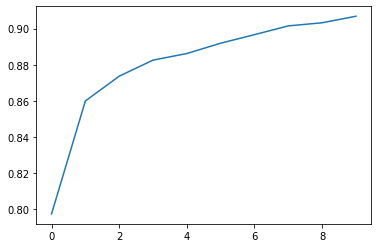

In [ ]:
plt.plot(history.history['accuracy'])
plt.show()

# **Predicting Test Values**

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
np.argmax(y_pred[0])  #9,thus ankle boot

9

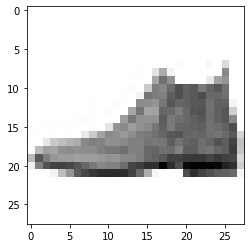

In [ ]:
plt.imshow(x_test[0],cmap= plt.cm.binary)
plt.show()
# plt.matshow() also does the same thing

In [ ]:
# argmax gives the index of the no having the max probability
y_pred = [np.argmax(i) for i in y_pred]
y_pred[:5]     

[9, 2, 1, 1, 6]

In [ ]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)

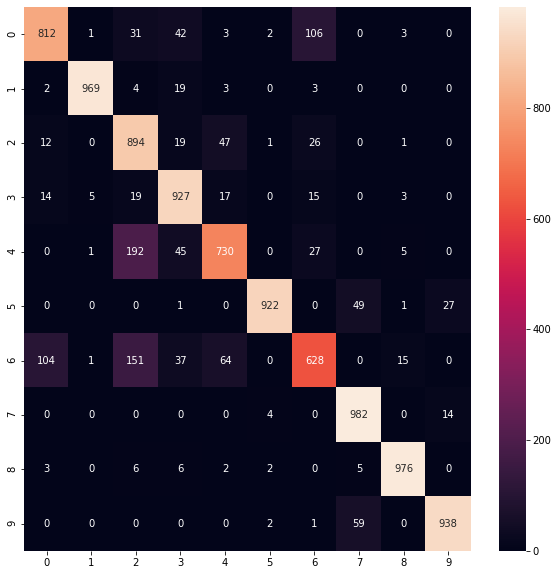

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm , annot = True ,fmt = 'd')        #confusion matrix plot, annot = annotation, d stands for  integer
plt.show()

In [ ]:
model.evaluate(x_train,y_train)    #training data accuracy

1875/1875 [==============================] - 2s 1ms/step - loss: 0.2439 - accuracy: 0.9083


[0.24392959475517273, 0.9082666635513306]

In [ ]:
model.evaluate(x_test,y_test)      #test data accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8778


[0.3442218005657196, 0.8777999877929688]